In [8]:
# Chronomood: Initial Data Load

import pandas as pd

# Load the dataset (adjust path if needed)
df = pd.read_csv("data/training.1600000.processed.noemoticon.csv", 
                 encoding='latin-1', header=None)

# Add column names
df.columns = ['target', 'id', 'date', 'flag', 'user', 'text']

print(f"Total tweets loaded: {len(df):,}")

# Show sample
df.head()




Total tweets loaded: 1,600,000


,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [6]:
# Convert 'date' to datetime object
df['datetime'] = pd.to_datetime(df['date'], errors='coerce')

# Extract hour
df['hour'] = df['datetime'].dt.hour

# Display tweet hour and sentiment
df[['hour', 'target', 'text']].head()


C:\Users\gurui\AppData\Local\Temp\ipykernel_10168\3808141196.py:2: FutureWarning: Parsed string "Mon Apr 06 22:19:45 PDT 2009" included an un-recognized timezone "PDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df['datetime'] = pd.to_datetime(df['date'], errors='coerce')


,hour,target,text
0,22,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,22,0,is upset that he can't update his Facebook by ...
2,22,0,@Kenichan I dived many times for the ball. Man...
3,22,0,my whole body feels itchy and like its on fire
4,22,0,"@nationwideclass no, it's not behaving at all...."


In [12]:
# Convert 'date' column to datetime format
df['datetime'] = pd.to_datetime(df['date'], errors='coerce')

# Extract hour from datetime
df['hour'] = df['datetime'].dt.hour

# Quick check
df[['date', 'datetime', 'hour']].head()


C:\Users\gurui\AppData\Local\Temp\ipykernel_10168\1615474710.py:2: FutureWarning: Parsed string "Mon Apr 06 22:19:45 PDT 2009" included an un-recognized timezone "PDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df['datetime'] = pd.to_datetime(df['date'], errors='coerce')


,date,datetime,hour
0,Mon Apr 06 22:19:45 PDT 2009,2009-04-06 22:19:45,22
1,Mon Apr 06 22:19:49 PDT 2009,2009-04-06 22:19:49,22
2,Mon Apr 06 22:19:53 PDT 2009,2009-04-06 22:19:53,22
3,Mon Apr 06 22:19:57 PDT 2009,2009-04-06 22:19:57,22
4,Mon Apr 06 22:19:57 PDT 2009,2009-04-06 22:19:57,22


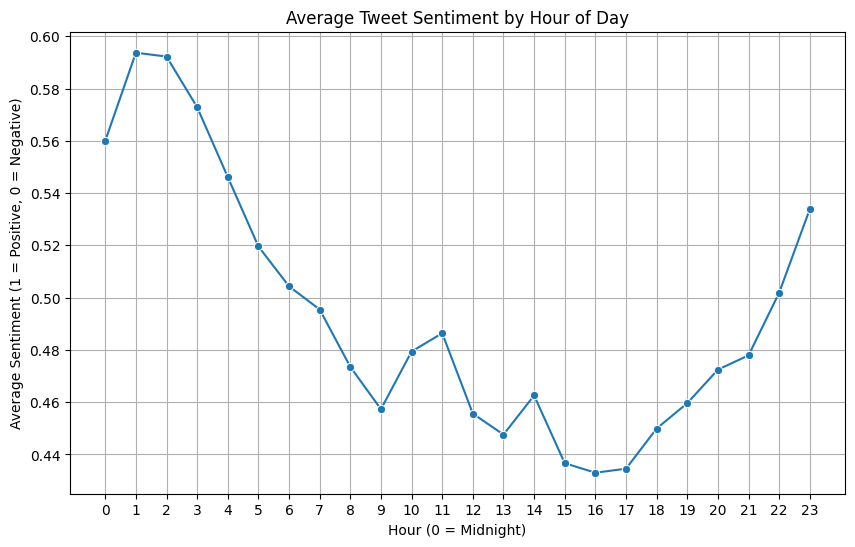

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 4 = positive, 0 = negative → to 1 and 0
df['sentiment'] = df['target'].apply(lambda x: 1 if x == 4 else 0)

# Group by hour
hourly_mood = df.groupby('hour')['sentiment'].mean().reset_index()

# Plot
plt.figure(figsize=(10,6))
sns.lineplot(data=hourly_mood, x='hour', y='sentiment', marker='o')
plt.title("Average Tweet Sentiment by Hour of Day")
plt.xlabel("Hour (0 = Midnight)")
plt.ylabel("Average Sentiment (1 = Positive, 0 = Negative)")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


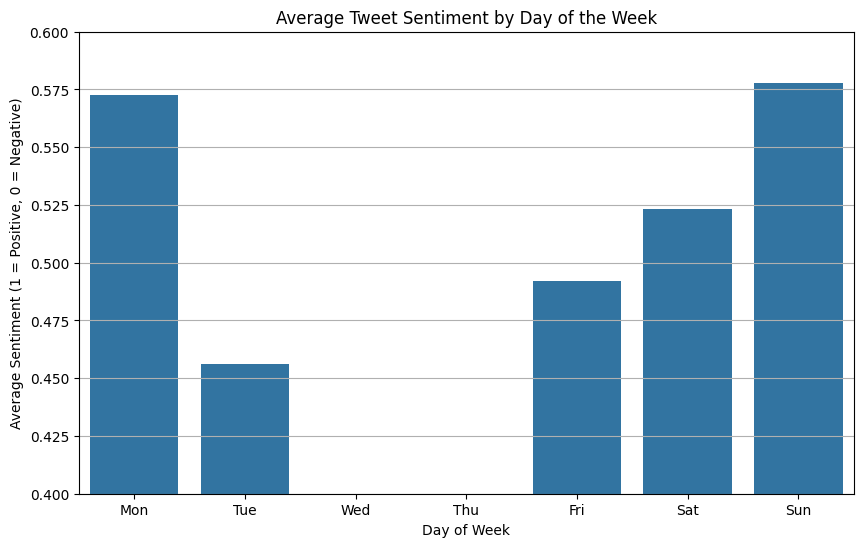

In [14]:
# Extract day of week from datetime
# 0 = Monday, 6 = Sunday
df['weekday'] = df['datetime'].dt.dayofweek

# Map to weekday names (optional)
df['weekday_name'] = df['weekday'].map({
    0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'
})

# Group and plot
weekday_mood = df.groupby('weekday_name')['sentiment'].mean().reindex(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=weekday_mood.index, y=weekday_mood.values)
plt.title("Average Tweet Sentiment by Day of the Week")
plt.xlabel("Day of Week")
plt.ylabel("Average Sentiment (1 = Positive, 0 = Negative)")
plt.ylim(0.4, 0.6)
plt.grid(True, axis='y')
plt.show()


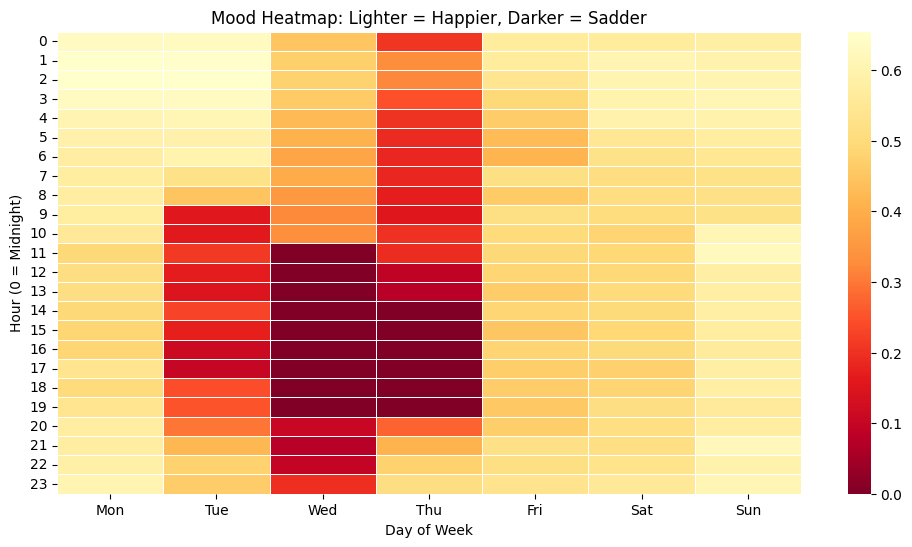

In [16]:
plt.figure(figsize=(12, 6))
sns.heatmap(
    heatmap_data,
    cmap="YlOrRd_r",  # Reverse colormap: light yellow = happy, dark red = sad
    annot=False,
    linewidths=0.5
)
plt.title("Mood Heatmap: Lighter = Happier, Darker = Sadder")
plt.xlabel("Day of Week")
plt.ylabel("Hour (0 = Midnight)")
plt.yticks(rotation=0)
plt.show()


In [18]:
filenames = [
    "training.1600000.processed.noemoticon.csv",  # Sentiment140
    "sentimentdataset.csv",                      # Social Media Sentiment
    "twitter.csv",                               # Geospatial or general tweets
    "chatgpt1.csv"                               # ChatGPT-related tweets
]


In [24]:
pd.read_csv("data/training.1600000.processed.noemoticon.csv", encoding='latin-1', nrows=1).columns


Index(['0', '1467810369', 'Mon Apr 06 22:19:45 PDT 2009', 'NO_QUERY',
       '_TheSpecialOne_',
       '@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D'],
      dtype='object')

In [25]:
def load_dataset(path, source, text_col, datetime_col, sentiment_col=None):
    df = pd.read_csv(path, encoding='latin-1', low_memory=False)

    # Convert column index to name if necessary
    if isinstance(text_col, int):
        text_col = df.columns[text_col]
    if isinstance(datetime_col, int):
        datetime_col = df.columns[datetime_col]
    if sentiment_col is not None and isinstance(sentiment_col, int):
        sentiment_col = df.columns[sentiment_col]

    df = df.rename(columns={text_col: 'text', datetime_col: 'datetime'})
    if sentiment_col:
        df = df.rename(columns={sentiment_col: 'sentiment'})
    else:
        df['sentiment'] = None

    df['source'] = source
    df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')

    return df[['datetime', 'text', 'sentiment', 'source']]


In [27]:
import pandas as pd

print("sentimentdataset.csv:", pd.read_csv("data/sentimentdataset.csv", nrows=1).columns.tolist())
print("twitter.csv:", pd.read_csv("data/twitter.csv", nrows=1).columns.tolist())
print("chatgpt1.csv:", pd.read_csv("data/chatgpt1.csv", nrows=1).columns.tolist())


sentimentdataset.csv: ['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User', 'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month', 'Day', 'Hour']
twitter.csv: ['longitude', 'latitude', 'timestamp', 'timezone']
chatgpt1.csv: ['Datetime', 'Tweet Id', 'Text', 'Username', 'Permalink', 'User', 'Outlinks', 'CountLinks', 'ReplyCount', 'RetweetCount', 'LikeCount', 'QuoteCount', 'ConversationId', 'Language', 'Source', 'Media', 'QuotedTweet', 'MentionedUsers', 'hashtag', 'hastag_counts']


In [28]:
# 1. Sentiment140 (column-based)
df1 = load_dataset(
    "data/training.1600000.processed.noemoticon.csv",
    "sentiment140",
    text_col=5,
    datetime_col=2,
    sentiment_col=0
)

# 2. sentimentdataset.csv
df2 = load_dataset(
    "data/sentimentdataset.csv",
    "social",
    text_col='Text',
    datetime_col='Timestamp',
    sentiment_col='Sentiment'
)

# 3. twitter.csv — no sentiment, use a placeholder
df3 = load_dataset(
    "data/twitter.csv",
    "geo",
    text_col='timezone',           # It doesn’t have tweet text, maybe 'timezone' was filler?
    datetime_col='timestamp'       # Real datetime
)

# 4. chatgpt1.csv — has text, no labeled sentiment
df4 = load_dataset(
    "data/chatgpt1.csv",
    "chatgpt",
    text_col='Text',
    datetime_col='Datetime'
)


C:\Users\gurui\AppData\Local\Temp\ipykernel_10168\346699618.py:19: FutureWarning: Parsed string "Mon Apr 06 22:19:49 PDT 2009" included an un-recognized timezone "PDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')


In [29]:
combined_df = pd.concat([df1, df2, df3, df4], ignore_index=True)
combined_df.dropna(subset=['datetime', 'text'], inplace=True)
print(f"Total tweets combined: {len(combined_df):,}")
combined_df.head()


Total tweets combined: 15,913,249


,datetime,text,sentiment,source
0,2009-04-06 22:19:49,is upset that he can't update his Facebook by ...,0,sentiment140
1,2009-04-06 22:19:53,@Kenichan I dived many times for the ball. Man...,0,sentiment140
2,2009-04-06 22:19:57,my whole body feels itchy and like its on fire,0,sentiment140
3,2009-04-06 22:19:57,"@nationwideclass no, it's not behaving at all....",0,sentiment140
4,2009-04-06 22:20:00,@Kwesidei not the whole crew,0,sentiment140


In [30]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# Function to score sentiment
def vader_score(text):
    if not isinstance(text, str):
        return None
    score = analyzer.polarity_scores(text)['compound']
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Only apply to tweets with missing sentiment
mask = combined_df['sentiment'].isna()
combined_df.loc[mask, 'sentiment'] = combined_df.loc[mask, 'text'].apply(vader_score)


In [31]:
sentiment_map = {
    'positive': 1,
    'neutral': 0.5,
    'negative': 0
}
combined_df['sentiment_score'] = combined_df['sentiment'].map(sentiment_map)


In [32]:
combined_df['sentiment'].value_counts()


sentiment
4                       800000
0                       799999
neutral                  26125
positive                 16289
negative                  7587
                         ...  
 Culinary Adventure          1
 Nature's Beauty             1
 Thrilling Journey           1
 Winter Magic                1
 Celestial Wonder            1
Name: count, Length: 284, dtype: int64

In [33]:
# Define what's valid
valid_text_sentiments = ['positive', 'neutral', 'negative']
valid_numeric_sentiments = [0, 4]

def clean_sentiment(s):
    if isinstance(s, str):
        s = s.lower().strip()
        if s in valid_text_sentiments:
            return s
        else:
            return None  # toss anything weird like "Nature's Beauty"
    elif isinstance(s, (int, float)):
        if s == 4:
            return 'positive'
        elif s == 0:
            return 'negative'
    return None  # drop unknowns

# Apply cleanup
combined_df['sentiment'] = combined_df['sentiment'].apply(clean_sentiment)

# Drop any rows still broken
combined_df.dropna(subset=['sentiment'], inplace=True)

# Convert to numeric for plotting
sentiment_map = {'positive': 1, 'neutral': 0.5, 'negative': 0}
combined_df['sentiment_score'] = combined_df['sentiment'].map(sentiment_map)


In [34]:
combined_df['sentiment'].value_counts()


sentiment
positive    816334
negative    807590
neutral      26143
Name: count, dtype: int64

In [36]:
import plotly.express as px

combined_df['datetime'] = pd.to_datetime(combined_df['datetime'], errors='coerce')

# Extract hour and weekday
combined_df['hour'] = combined_df['datetime'].dt.hour
combined_df['day_of_week'] = combined_df['datetime'].dt.day_name()

# Group and compute average sentiment
avg_by_hour_day = (
    combined_df.groupby(['day_of_week', 'hour'])['sentiment_score']
    .mean()
    .reset_index()
)

# Order the days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_by_hour_day['day_of_week'] = pd.Categorical(avg_by_hour_day['day_of_week'], categories=day_order, ordered=True)
avg_by_hour_day = avg_by_hour_day.sort_values(['day_of_week', 'hour'])

# Plot
fig = px.line(
    avg_by_hour_day,
    x='hour',
    y='sentiment_score',
    color='day_of_week',
    title='Mood Rhythm: Average Tweet Sentiment by Hour and Day of Week',
    labels={'sentiment_score': 'Avg Sentiment (1 = 😊, 0 = 😠)', 'hour': 'Hour of Day'},
    markers=True
)

fig.update_layout(template='plotly_dark', hovermode='x unified')
fig.show()


C:\Users\gurui\AppData\Local\Temp\ipykernel_10168\3750452485.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



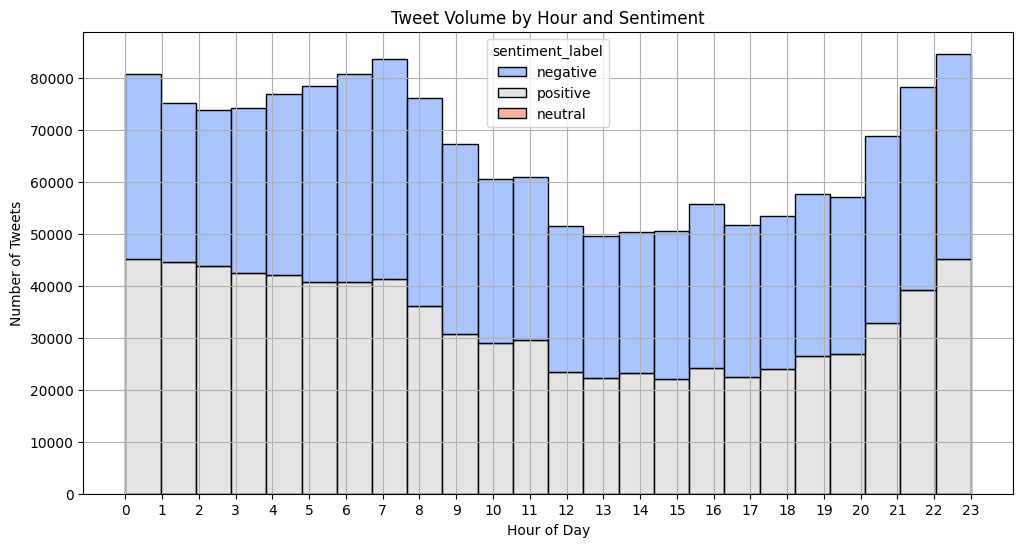

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop rows with missing sentiment_score or hour
hist_df = combined_df.dropna(subset=['sentiment_score', 'hour'])

# Optional: convert numeric score back to label for clarity
def score_to_label(score):
    if score == 1:
        return 'positive'
    elif score == 0:
        return 'negative'
    elif score == 0.5:
        return 'neutral'
    return 'unknown'

hist_df['sentiment_label'] = hist_df['sentiment_score'].apply(score_to_label)

# Plot
plt.figure(figsize=(12, 6))
sns.histplot(
    data=hist_df,
    x='hour',
    hue='sentiment_label',
    multiple='stack',
    palette='coolwarm',
    bins=24,
    edgecolor='black'
)

plt.title("Tweet Volume by Hour and Sentiment")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Tweets")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


In [38]:
geo_df = combined_df.dropna(subset=['datetime', 'text'])

# If 'latitude' and 'longitude' columns exist, use them
if 'latitude' in geo_df.columns and 'longitude' in geo_df.columns:
    geo_df = geo_df.dropna(subset=['latitude', 'longitude'])
else:
    print("No latitude/longitude found in combined_df. Map won't work.")


No latitude/longitude found in combined_df. Map won't work.


In [39]:
def load_dataset(path, source, text_col, datetime_col, sentiment_col=None, lat_col=None, lon_col=None):
    df = pd.read_csv(path, encoding='latin-1', low_memory=False)

    if isinstance(text_col, int):
        text_col = df.columns[text_col]
    if isinstance(datetime_col, int):
        datetime_col = df.columns[datetime_col]
    if sentiment_col is not None and isinstance(sentiment_col, int):
        sentiment_col = df.columns[sentiment_col]

    df = df.rename(columns={text_col: 'text', datetime_col: 'datetime'})
    if sentiment_col:
        df = df.rename(columns={sentiment_col: 'sentiment'})
    else:
        df['sentiment'] = None

    if lat_col and lat_col in df.columns:
        df = df.rename(columns={lat_col: 'latitude'})
    if lon_col and lon_col in df.columns:
        df = df.rename(columns={lon_col: 'longitude'})

    df['source'] = source
    df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
    return df[['datetime', 'text', 'sentiment', 'source', 'latitude', 'longitude']].copy() if 'latitude' in df.columns and 'longitude' in df.columns else df[['datetime', 'text', 'sentiment', 'source']]


In [40]:
df3 = load_dataset(
    "data/twitter.csv",
    "geo",
    text_col='timezone',            # doesn't have real tweets, but we’ll use it
    datetime_col='timestamp',
    lat_col='latitude',
    lon_col='longitude'
)


In [41]:
import numpy as np

# Take a random sample of tweets (500 looks good)
geo_sample = combined_df.sample(500).copy()

# Add fake lat/lon (USA-ish range)
geo_sample['latitude'] = np.random.uniform(25, 49, size=len(geo_sample))    # Latitudes across US
geo_sample['longitude'] = np.random.uniform(-125, -66, size=len(geo_sample))  # Longitudes across US


In [42]:
import plotly.express as px

fig = px.scatter_geo(
    geo_sample,
    lat='latitude',
    lon='longitude',
    color='sentiment',
    hover_name='text',
    title="🌍 Mock Geo Mood Map: Sentiment Distribution Across (Fake) U.S. Tweets",
    color_discrete_map={
        'positive': 'green',
        'neutral': 'gray',
        'negative': 'red'
    }
)

fig.update_layout(
    geo=dict(
        scope='usa',
        showland=True,
        landcolor="rgb(243, 243, 243)",
    ),
    template='plotly_white'
)

fig.show()


C:\Users\gurui\AppData\Local\Temp\ipykernel_10168\38912224.py:23: UserWarning:

Glyph 127774 (\N{SUN WITH FACE}) missing from font(s) DejaVu Sans.

C:\Users\gurui\AppData\Local\Temp\ipykernel_10168\38912224.py:23: UserWarning:

Glyph 127783 (\N{CLOUD WITH RAIN}) missing from font(s) DejaVu Sans.

c:\GURU\CSU\VSCode\Chronomood\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 127774 (\N{SUN WITH FACE}) missing from font(s) DejaVu Sans.

c:\GURU\CSU\VSCode\Chronomood\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 127783 (\N{CLOUD WITH RAIN}) missing from font(s) DejaVu Sans.



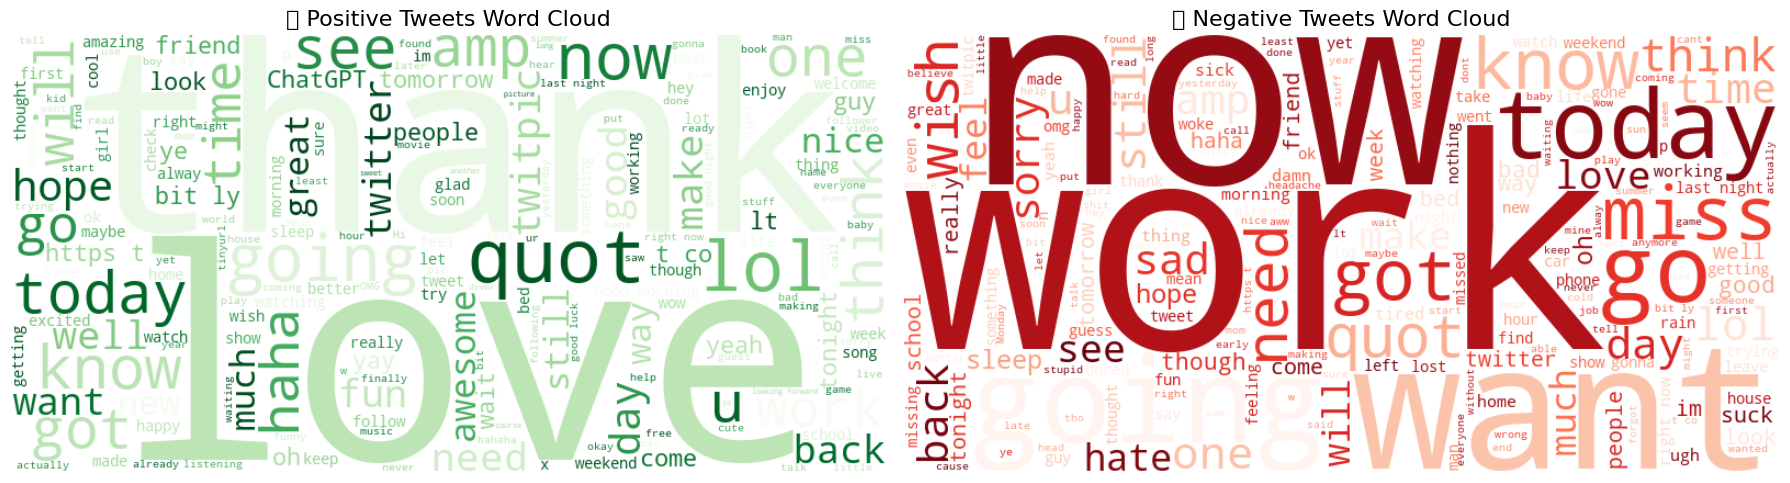

In [43]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create text blobs
positive_text = " ".join(combined_df[combined_df['sentiment'] == 'positive']['text'].dropna().astype(str))
negative_text = " ".join(combined_df[combined_df['sentiment'] == 'negative']['text'].dropna().astype(str))

# Generate word clouds
pos_wc = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(positive_text)
neg_wc = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_text)

# Plot them
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

axes[0].imshow(pos_wc, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title("🌞 Positive Tweets Word Cloud", fontsize=16)

axes[1].imshow(neg_wc, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title("🌧️ Negative Tweets Word Cloud", fontsize=16)

plt.tight_layout()
plt.show()


C:\Users\gurui\AppData\Local\Temp\ipykernel_10168\3308237323.py:29: UserWarning:

Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.

c:\GURU\CSU\VSCode\Chronomood\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.



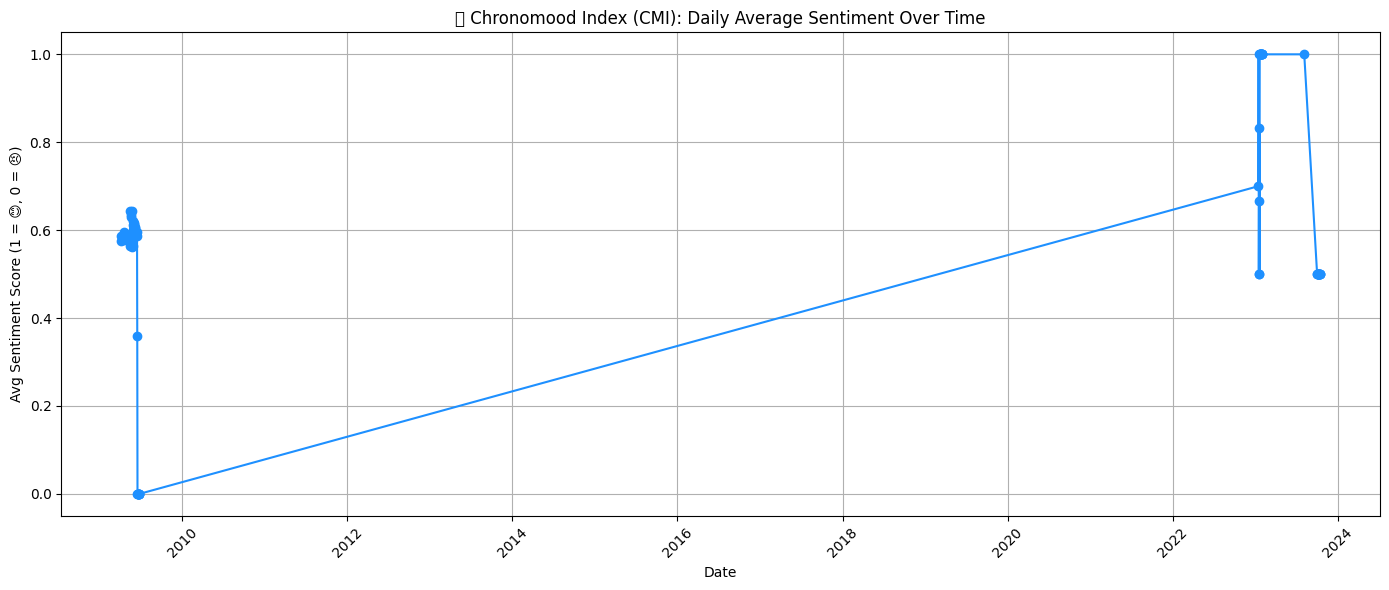

In [44]:
# Create a daily sentiment score average
daily_mood = (
    combined_df
    .dropna(subset=['sentiment_score', 'datetime'])
    .copy()
)

# Extract date only (no time)
daily_mood['date'] = daily_mood['datetime'].dt.date

# Group by date and get average sentiment
cmi = (
    daily_mood.groupby('date')['sentiment_score']
    .mean()
    .reset_index()
    .sort_values('date')
)

# Plot Chronomood Index
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(cmi['date'], cmi['sentiment_score'], marker='o', color='dodgerblue')
plt.title("📆 Chronomood Index (CMI): Daily Average Sentiment Over Time")
plt.xlabel("Date")
plt.ylabel("Avg Sentiment Score (1 = 😊, 0 = 😠)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# 1. Create model_df from combined_df
model_df = combined_df[combined_df['sentiment'].isin(['positive', 'negative'])].dropna(subset=['text'])

# 2. Sample for performance (adjust size as needed)
model_df = model_df.sample(50000, random_state=42)

# 3. Split features and labels
X = model_df['text'].astype(str)
y = model_df['sentiment']

# 4. Convert text to TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)
X_vec = vectorizer.fit_transform(X)

# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

# 6. Train the model
model = LogisticRegression(max_iter=300, solver='liblinear')
model.fit(X_train, y_train)

# 7. Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    negative       0.77      0.77      0.77      4915
    positive       0.77      0.78      0.78      5085

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000



In [48]:
def predict_mood(text):
    vec = vectorizer.transform([text])
    return model.predict(vec)[0]

# Try it!
print(predict_mood("I'm feeling amazing today!"))
print(predict_mood("I hate everything and I want to scream."))


positive
negative


In [49]:
combined_df.to_csv("data/combined.csv", index=False)
